# Scikit-Learn

### PREVENDO PREÇO DA PIZZA

In [3]:
import matplotlib as matp
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]

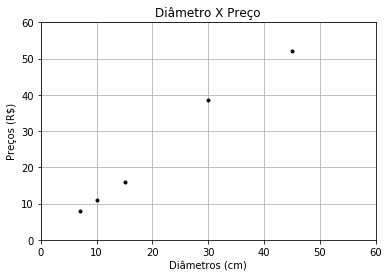

In [5]:
# Gráfico simples para visualização das informações
plt.figure()
plt.xlabel ('Diâmetros (cm)')
plt.ylabel ('Preços (R$)')
plt.title ('Diâmetro X Preço')
plt.plot (Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid (True)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression # Importar a biblioteca e função do scikit-learn

In [20]:
# Preparando os dados de treinos 

# Chamar de X os dados de diâmetro da Pizza
x = [[7],[10], [15], [30], [45]]

# Chamar de Y os dados de preço da Pizza
y = [[8], [11], [16], [38.5], [52]]

In [21]:
# Criando modelo linear 
modelo = LinearRegression()


In [22]:
type(modelo)

sklearn.linear_model._base.LinearRegression

In [23]:
# Treinando o modelo 
modelo.fit(x, y) # Fit recebe os dados de 'x' e 'y' e treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Prevendo o preço de 20 cm de diâmetro 
print('Uma pizza de 20 cm de diâmetros deve custar: R$%.2f' %modelo.predict([[20]]))

Uma pizza de 20 cm de diâmetros deve custar: R$23.41


# Construindo um Scatter plot

In [56]:
# Coeficientes 
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error) # Erro médio para saber se o modelo aplicado é eficaz. 
print('MSE: %.2f' % np.mean((modelo.predict(x) - y ) ** 2))

# Score de variação: 1 representada predição perfeita
print('Score de variação: %.2f' % modelo.score(x, y))

Coeficiente: 
 [[1.20422117]]
MSE: 2.74
Score de variação: 0.99


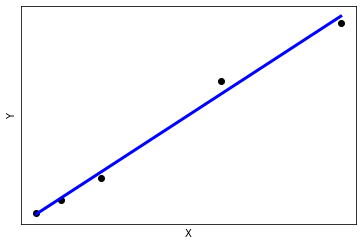

In [62]:
# Scatter Plot representado a regressão linear 
plt.scatter(x, y, color = 'black')
plt.plot(x, modelo.predict(x), color='blue', linewidth = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())
plt.show()

## Explorando o dataset de Boston housing

### Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [2]:
# Importando bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import sklearn 
%matplotlib inline

In [25]:
# Dataset já está disponivel no scikit-learn. Precisamos apenas carrega-los. 
from sklearn.datasets import load_boston # Importou direto da biblioteca o dataset. 
boston = load_boston()

In [26]:
# Verificar o tipo de váriavel da boston 
type(boston)

sklearn.utils.Bunch

In [27]:
# Visualizando o shape dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [28]:
# Descrição do dataset 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [30]:
# convertendo o dataset para pandas. 
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
# Boston target é um array com o preço das casas 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [33]:
# Adicionando preço da casa ao DataFrame 
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
